# Authoring and Editing WebMaps
-----------------------------------------------


## Authoring a WebMap:


### Connect to our GIS

In [2]:
from arcgis.gis import GIS
from arcgis.mapping import WebMap

gis = GIS(profile="your_online_portal")

### Getting the layers we will add:

In [3]:
items = gis.content.search("Cougar Habitat, owner:naubry_geosaurus", item_type="Feature Layer")
items

[<Item title:"Cougar_Habitat" type:Feature Layer Collection owner:naubry_geosaurus>]

<Item title:"Cougar_Habitat" type:Feature Layer Collection owner:naubry_geosaurus>
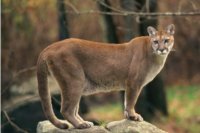

In [4]:
cougar_item = items[0]
cougar_item

In [5]:
cougar_item.layers

[<FeatureLayer url:"https://services7.arcgis.com/JEwYeAy2cc8qOe3o/arcgis/rest/services/Cougar_Habitat/FeatureServer/0">,
 <FeatureLayer url:"https://services7.arcgis.com/JEwYeAy2cc8qOe3o/arcgis/rest/services/Cougar_Habitat/FeatureServer/1">,
 <FeatureLayer url:"https://services7.arcgis.com/JEwYeAy2cc8qOe3o/arcgis/rest/services/Cougar_Habitat/FeatureServer/2">,
 <FeatureLayer url:"https://services7.arcgis.com/JEwYeAy2cc8qOe3o/arcgis/rest/services/Cougar_Habitat/FeatureServer/3">,
 <FeatureLayer url:"https://services7.arcgis.com/JEwYeAy2cc8qOe3o/arcgis/rest/services/Cougar_Habitat/FeatureServer/4">,
 <FeatureLayer url:"https://services7.arcgis.com/JEwYeAy2cc8qOe3o/arcgis/rest/services/Cougar_Habitat/FeatureServer/5">,
 <FeatureLayer url:"https://services7.arcgis.com/JEwYeAy2cc8qOe3o/arcgis/rest/services/Cougar_Habitat/FeatureServer/6">,
 <FeatureLayer url:"https://services7.arcgis.com/JEwYeAy2cc8qOe3o/arcgis/rest/services/Cougar_Habitat/FeatureServer/7">]

## Creating a MapView: gis.map()

In [6]:
mmap = gis.map("Oregon") #can pass in the extent
mmap

MapView(layout=Layout(height='400px', width='100%'))

In [8]:
mmap.zoom = 10

In [9]:
mmap.extent

{'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
 'xmin': -14625165.177267753,
 'ymin': 4979309.664161315,
 'xmax': -12215870.045719638,
 'ymax': 5957703.626211312}

In [10]:
for layer in cougar_item.layers:
    mmap.add_layer(layer)

In [11]:
properties = {
    "title": "Cougar Habitat Map Using MapView", 
    "tags": ["python", "example"], 
    "snippet": "A map of cougar habitats created with the gis.map() method"}
webmap_item = mmap.save(item_properties=properties)
webmap_item

<Item title:"Cougar Habitat Map Using MapView" type:Web Map owner:naubry_geosaurus>

## Editing the WebMap

### Search our Items

In [12]:
# Search for our WebMap Items
items = gis.content.search("Cougar Habitats, owner:naubry_geosaurus", item_type="Web Map")
items

[<Item title:"Cougar Habitats" type:Web Map owner:naubry_geosaurus>,
 <Item title:"Cougar Habitat Map Using MapView" type:Web Map owner:naubry_geosaurus>]

<Item title:"Cougar Habitat Map Using MapView" type:Web Map owner:naubry_geosaurus>
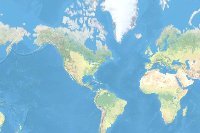

In [13]:
# Get the webmap we will edit
webmap_item = items[1]
webmap_item

### Create a WebMap Object from an Existing WebMap Item

In [14]:
webmap = WebMap(webmap_item)
webmap

MapView(hide_mode_switch=True, layout=Layout(height='400px', width='100%'))

------------------------------------------------------
### Looking at the Basemap Property

In [15]:
webmap.basemap

{
  "baseMapLayers": [
    {
      "url": "https://services.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer",
      "layerType": "ArcGISTiledMapServiceLayer",
      "resourceInfo": {
        "currentVersion": 10.3,
        "mapName": "Layers",
        "supportsDynamicLayers": false,
        "layers": [
          {
            "id": 0,
            "name": "Citations",
            "parentLayerId": -1,
            "defaultVisibility": false,
            "subLayerIds": null,
            "minScale": 0,
            "maxScale": 0
          }
        ],
        "tables": [],
        "spatialReference": {
          "wkid": 102100,
          "latestWkid": 3857
        },
        "singleFusedMapCache": true,
        "tileInfo": {
          "rows": 256,
          "cols": 256,
          "dpi": 96,
          "format": "JPEG",
          "compressionQuality": 90,
          "origin": {
            "x": -20037508.342787,
            "y": 20037508.342787
          },
          "spatialRefe

In [16]:
webmap.basemaps

['dark-gray-vector',
 'gray-vector',
 'hybrid',
 'oceans',
 'osm',
 'satellite',
 'streets-navigation-vector',
 'streets-night-vector',
 'streets-relief-vector',
 'streets-vector',
 'terrain',
 'topo-vector',
 'arcgis-imagery',
 'arcgis-imagery-standard',
 'arcgis-imagery-labels',
 'arcgis-light-gray',
 'arcgis-dark-gray',
 'arcgis-navigation',
 'arcgis-navigation-night',
 'arcgis-streets',
 'arcgis-streets-night',
 'arcgis-streets-relief',
 'arcgis-topographic',
 'arcgis-oceans',
 'osm-standard',
 'osm-standard-relief',
 'osm-streets',
 'osm-streets-relief',
 'osm-light-gray',
 'osm-dark-gray',
 'arcgis-terrain',
 'arcgis-community',
 'arcgis-charted-territory',
 'arcgis-colored-pencil',
 'arcgis-nova',
 'arcgis-modern-antique',
 'arcgis-midcentury',
 'arcgis-newspaper',
 'arcgis-hillshade-light',
 'arcgis-hillshade-dark',
 'arcgis-human-geography',
 'arcgis-human-geography-dark']

### Editing the Basemap

In [17]:
webmap.basemap = "hybrid"

------------------------------------------------------
## Editing Field Visibility in Pop Ups


1) Find which layer you want to configure

In [18]:
# all layers in webmap
for layer in webmap.layers:
    print(layer["title"])

vegetation
sub_watershed
steep_slope
state_park
national_forest
major_watershed
stream
highway


In [19]:
# get the layer
national_forest = webmap.get_layer(title="national_forest")

# popup info property
national_forest.popupInfo

{
  "title": "national_forest",
  "fieldInfos": [
    {
      "fieldName": "FID",
      "label": "FID",
      "isEditable": false,
      "visible": true
    },
    {
      "fieldName": "objectid_1",
      "label": "objectid_1",
      "isEditable": true,
      "visible": true
    },
    {
      "fieldName": "objectid_2",
      "label": "objectid_2",
      "isEditable": true,
      "visible": true
    },
    {
      "fieldName": "objectid",
      "label": "objectid",
      "isEditable": true,
      "visible": true
    },
    {
      "fieldName": "db_s1tbu_h",
      "label": "db_s1tbu_h",
      "isEditable": true,
      "visible": true
    },
    {
      "fieldName": "perimeter",
      "label": "perimeter",
      "isEditable": true,
      "visible": true
    },
    {
      "fieldName": "owner_code",
      "label": "owner_code",
      "isEditable": true,
      "visible": true
    },
    {
      "fieldName": "owner_name",
      "label": "owner_name",
      "isEditable": true,
      "visible

2) Find the field names that show up in the pop up for the **National Forest** layer

In [20]:
fields = []
# loop through to gather the field names
for field in national_forest.popupInfo.fieldInfos:
    fields.append(field["fieldName"])

3) Remove the field we want to keep as visible: **perimiter**

In [21]:
fields.remove("perimeter")
# list of fields that will be edited
fields

['FID',
 'objectid_1',
 'objectid_2',
 'objectid',
 'db_s1tbu_h',
 'owner_code',
 'owner_name',
 'st_area_sh',
 'st_length_',
 'Shape__Area',
 'Shape__Length']

4) Configure the pop ups using: **configure_pop_ups()**

What are we doing?  
- *layer_title* : Specifying the layer we want to apply this to
- *field_names* : Specifying the list of field names that we want this to apply to
- *visibility*  : Specifying whether these fields will be visible (True) or not visible (False)

In [22]:
# Here we set our fields to false visibility
webmap.configure_pop_ups(layer_title=national_forest.title, field_names=fields, visibility=False);

In [23]:
national_forest.popupInfo

{
  "title": "national_forest",
  "fieldInfos": [
    {
      "fieldName": "FID",
      "label": "FID",
      "isEditable": false,
      "visible": false
    },
    {
      "fieldName": "objectid_1",
      "label": "objectid_1",
      "isEditable": true,
      "visible": false
    },
    {
      "fieldName": "objectid_2",
      "label": "objectid_2",
      "isEditable": true,
      "visible": false
    },
    {
      "fieldName": "objectid",
      "label": "objectid",
      "isEditable": true,
      "visible": false
    },
    {
      "fieldName": "db_s1tbu_h",
      "label": "db_s1tbu_h",
      "isEditable": true,
      "visible": false
    },
    {
      "fieldName": "perimeter",
      "label": "perimeter",
      "isEditable": true,
      "visible": true
    },
    {
      "fieldName": "owner_code",
      "label": "owner_code",
      "isEditable": true,
      "visible": false
    },
    {
      "fieldName": "owner_name",
      "label": "owner_name",
      "isEditable": true,
      "v

------------------------------------------------------
## Adding Bookmarks


In [24]:
webmap.bookmarks

[]

In [25]:
bookmark1 = {
    'extent': {'xmin': -13694599.8997628,
               'ymin': 5504848.1034346,
               'xmax': -13583290.8097876,
               'ymax': 5586989.70506968,
               'spatialReference': {'wkid': 102100, 'latestWkid': 3857}},
    'name': 'PythonUpdate1',
    'thumbnail': {'url': 'data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAIAAAACACAYAAADDPmHLAAAAAXNSR0IArs4c6QAAFTFJREFUeF7tXWmPHMd5fqqq7557T+7BWwcpybYc04msJAIMxB8SJPmB+RnJlyAXEthIjMSQDSsKKUu8r+Wec/ZZVcFbPbvcJbkn2zSH0/VBhGZ7amrqed77rRqG5pJGNaZ2B1hFgKnF3nzxigDTjX9FgCnHvyJARYDKCZxqDlQ+wFTDXzmBUw5/RYCKAFUeYLo5UPkA041/FQZOOf4VASoCVHmAqeZA5QNMNfxVGDjl8FcEqAhQ5QGmmwOVDzDd+Fdh4JTjXxGgIkCVB5hqDlQ+wFTDX4WBUw5/RYCKAFUeYLo5UPkA041/FQaeBX/H4silhtIHT9VxzqDUZJ20qzTAWRgAIHQtDJP8wLuX2gG2IyCKR2ec9c29jXMB3+GVBihzy8+1PLRDB0mu8N3aoMypS53LtwVWZwIIzioClLmznDFcWpyFzVLcfNwtc+rXnovWZgsGslDvLdbMfBnzKwK89s6OJyCTMEpyzDZraLQWsNNPsLX9CIA2kkY+w5sYgStgcW7MU+AINAMHXDiwLRsuTw4sQfjtigBlgTLTrKHuctx91sNs3UVY76Db3YLgGgsND1GqcX9zAFmSk9gOXUOuQSLhCIYolbg8H4Ic1P1D2Q2kcQTFHEgtUBN9MIzJ6DYrApRFAJrno8ur2NnZxNYwx/LCPByu0R904XohtMwhILEzjLDeT6FfiCBOsw6S8pWZJqI0M9KudSHtkfKRShuhFcFimZlSOy3kSQ+24wNWCAgXyq5B1q/Aip9WBDjNxh/37PsXVsAYw9r6Gpbn5zAa9TFKJHzPQ2BJQCszxXbWxNP1x9BagjFh/j1q1FwLgySHLThCz0K70UErYLh65RIePHqMehgA3EKc5BhZs+iLJYBxgAsgH4HLGCx6Zgio4m0I24Psk3mqUsHHYXqqv189v4I4SbG9s4W5po8oVfCDGnzXAVcxdF7YYA1S08wAlGQSSRpjs58izl4mgu8IXJoLQQqDsfFyuA1eW0J77hxc2UM23AATFtJ4hDSTGA37BbjChlYSwq1Bxj1wO4DKRhBeEzIunNQqD3AqiI9++MLSOQyjGHU7Rz+RCMMGap5NUBvwdjedZhmpEKHHoGQOJmMozRDn2vw/OYyk5jOpTL4BTIAFc1C1i5DuLJBsgXe/A4s3wFCQhkCNo5EhV64teDwCh0JPNpEp20AdWCl83i8IEG1XBCgRezPV8vwsur0d1HzP2P3As41UkuonpzAfbRz4SCucM6QgKQW3IYIZSKWgnA6014G26wX4yTb46BHUYA1CFUmmTNtQWhRRBpPG2STVrtIhNCi+Lxy9RHlItW2I4fMIjs32NFGlAUpmgOAcs80mXDeAVpQlzJGnI0itEYQt1AMHMtoBuAPduATZ+gBMJkDaBcuHYGSvGUfWXwOTEQQKR045bcRRCgUGm2UvhXO7X4NxC8xyDQmKwYzqYZYPbhWfTaZCy6x43e1UJqBMDjR8G0FjhYTSSGHH3jSSyCyv+JhgEWnrI1h5H6L/HUAOmd+GjLagsmisyltIoz4YI5ktnEYCkuSZ/psqFzZPn4dyL3wBJtwCZCKgVtCkUTStptAIu/+SmRjIekWAMglw/fwcuLBBkkgSppJeod5pLNwwDpgdPQJ5dOSUGXfQrUMlhdNGg6CicI7Uu89HRr2fbrDC+ZPpS29jXDxfz9hvqJzA0+3uoU+vzIRo1gIkSQrNBCyvjn5vC51WB3DqyLxF2L1bRdiXx4YMrzsoscMZGYYXqpIvkGr3c/Z7/7uvVQR4XRQAXJyroVZvAVoi1wK2JaDSgbG1jl/DcPbPEH3z96BysR/UYWlKBKm9vMBpl5BpB31Zh9bcZPZcHhfq3WgfG9wJkA8POpz098LcFN4/d2rGVFQEOO3u73uekj5XF5vw67PQKi0cvBfGR5//Dbrrj/D4ztfGzu/G5twJjUUmM3HUICknTz4Qu47dwaeZcEBzUY5B5ZExL8JtQB6Yl4FxDu61oMdrIIIqnVcEOCv+MzUHrTCA55LUiVeq9Isff45aaxZf//Kf9sAh0I2kWt6x4B+6NsYLCQYg08FLmoTmLvwQvrc24/mPM5E0r9IcnJP5qM4FnIoDni0w35mBZoBgAhwS3lgF707Uml/FxY8/gxc08V//8HcvzU/gEXo6i8fh4smWQMSh95pY/xVO3nGzKHATWUQqMIUhYzYqAhy3bcXfKcZf6MwCKkKnWcdw0IXfmAPircKmCgtzq++jNbeCWw+6uHZpBr/71b8iTwv7HCvfkMXmGSyfMnE7B2zyyVZx/FP7k0C5tveKQrvvJOC38tlCAzBZEeD4LQXCoIVGZwU1vY5B7oOrHmoOx6WPfwzBNOqdRWRJhGiwg80nd9Dfemps8WFDeC3IeOcVtvokqzn8GQLVaBbNsJ13xg5igpiygcqBwzMTWprnyBQxoktlAg7d0flmgJYvIJkDN2whGW7B5RJWfRGZv4Ibn17Dt1/+O3obj6B24/3xbIWE7SZyDn4Et0OobGiydrsFoteDnjSMZ0xRolyQqqf8AWUNXwwR6XOGsmaeoc6ligCv2HlLCAT1ZbS9DCrrgnroqKGn3pzBJ5//JTYe3cbG04cYbt4/E27koJkS8Gv0BOz/YAKUij+HJo2YhuaFRqJ/yX9hiv5TaYADAJKDR82SluDGSaIN5baPyx/dQDIaoDm/jLX732Hj/v8WoZfMzuSM7UYCZ3HkjmQcAb37wBhwJTS0eLUmqpzAfbs51/AwV3f2XqEauuf7QLiEj3/4GW7/+t+w9eQOlKL8em5auwY6RFOcLaPH3RpUcvbOYSPJQhWSTXafna3ncOpNgOu1sNB04YsMriPgNzroLF5EY4Ycuxi3v/ol0mHh6b84mB2AMW6yfkcNsreF3tUQwioaM/LoxPZ/D2wC2gB+NrAPNJWMFzy1BLA4Q6PWwkJdYTsNQE2dK5euojGzgLU7X2Hz0bcwAAvrlRm+XcD3p1cPI4EJzbg17szpnjgFTBIundMWg56vQkqNLNdIEo3RSCJOFHyPY3HhuaabSgK4tsCVeUrF7hv1VSh3FnzjywMv7+bX+4Oe8Q3cF7puj/MCi9x8WKRm92XiDnufspSRcCP1Yzt+3Ge86u9b2zk2Not+As4B1+VYXaZO4oNj6ghABZnlhSX4Noclu8aWC9tHvvQFrAf/+Hx3qIdr7KUTgJTQoUTOSQcBSRLMKBxMD7Zqv2oOLTSknRt7XsZIEmWKT5ZF8f7LM1IhKZXudIWBtBEfnKub9ispAthygERZ4Bd+Bmft59DJ82IOqXZkA1PNoyaLqLd+oJb+ahAVjNfNSYr3cUlyiLRIvdLYs+n07BnteRkkoTmmSgMszS2i5Yx76kQdFPalzesQ3Ztg1JZFBZp0BGFZaM1fAIQN13Wx+fg7JKPnTRsHbQQgbXlkqGU2muLufQQoC8DXnWdqCGBKt+c6EEiN2rdtD3F4CY4lwLe/NvtYn1lGrTUD16+hv/3MOIJ7oO1rtNx7kWnkbnlq+3XBPOr99J3zTBtfYP+YCgKQ7H241ECSS3N0ig5Kwg4gz30B69G/GO+c6xRLV76Ptfu38OTpU7QC6wD4hboch19MG+/8MCdNKhucU639bOFamUTY3MpMFOB5HGHI4TpTSICZRoBmZwVWumGye8YpWv0L1Aa/Rb2zgLDRwfbTe0bV06BzdkIIOM/NdmG7hYJx7l7DOy8T3OPmIh+WQsE01XuHUz2Xw3Gem6N3WgOQpC+1PdT8AMyyISwHKt6BPPfnmPcGGK7fgcpTpPGru20mEfRdUgyGEpag/AOMxqNQkAgh6LX9Duq7WA2kL9wObczVXRMKGfVtWqfqyJ120Smz882RAqRsaaT9XR/vnAbw/Sbm6wKhnZuSp+nL3+2J92chZz8Ff/jPh1biDPBUPCkpHn/bCfROEWC+4Zqz+STtVKmjih7VycnueyJBdv6v4D37ucHk3qPHWOn4B/CRbn6sfWfMghAhuAigVIQ8e7kR9G0H/Z2NAs7Pt1FzFBRdfaJGB4Q4X/4p3N5NyMETcMtHThm6fFDE75oVOfdjkjJc+LCsxvOz/VoiyzYnCe+X1vrOaAAK70yc7wSmRs9sH3JUgKPbHwIyAevdKTaAE+DjCxSOBZ0uU6IuWwck/YqOeasMef523QF0VhZOPAHoJG7Dd9DyKcNbnH8v3FwOTgcluQvZvg7x9Bdmj8ixIzt/QA0yAddaMHn7RG0a1V4MBpJ6zt1xB480RMiz4nDF8WO/I/GHzwm8ar0TTQAq6b53jg44FuAz24PO06InXri4tDKHLE1hC4U4jo1jN8pGeNZd29sLOqrl8UUgH5+lEzZivQ6tCw1hO3NFCkjn5jWZH5ISNiVfG4L75kg3PatUYtZG18Fw7hRE2ofC7mcoOSxOCv0BxsQSgFT+cqcGy7JN8yNJvem2jbaR5srEwNbKn4Jv/RoQCahZylzSoCQyReAy2FYLLmqms1dKiUxG0FDIRQLLbkPRaR85MKd+Dg6KqwlQ7wDYZBrM0eAjhlJAnhMhaUUaUVQAH8XFv3l+8P1Uzds/HIdDjJN5VNunFDc9Y9uHV/6OWg+z2ss6L+nmqjdJYDqZ44WLxtOvW304Nh932BQbKOf/GFw9hRw+z+fT6ySFrpgFkwo2F8jyzEhfynqQeOEaNathOn7GvdbmYKeic30qNeQ4DOz9II+iohEjp9PaWpfVB3roVhPJd8vAjbpALRSGHIcNdu3ah/rm495bkLU+OX0o3GuFDiTImxfj2y9GRjJ08yry5lWw7s+BZLOQZElXp9B1ajPgVBBxXCiSeKP2NWK2bf5+1LDs1oGQj7JqJK1JqkyuPYol0kSbQlNJzb4n35BjniRSUC2g1bQQBnQkbF8quLF4Qfeiwt5Nwgg8Dxdnnrc00ZrpbF6w8AG6fBnWxv8AyTb2x/S+tYDACjCKBnBsF3HeNwcjFcshcbgkG00ybquKI2XUdCHNbx/Ip8GO0sH1mkCrNWGng8OwjVathpoY7PXAU37/+ud/Dct28dV//weybnE7p7GnHpVq6aYNGw3nHHKZYCjXjZ0/bJBN3u7mIMDfRmk+DdAneZbZnVWdyZO3Op1k0t/HM5bloNm+AJvnaIodDOIErZllXL72PXP8euvxbXC3YWL03TPw5ILnXgYXLSiWIdMvF31Iwqlw0u1JUBvV26a+fx97uX9OdvX99/XdjeEbu8v2LF9oqe3j8XYECvvOtXy4Nsf1H/8MM+fO49mD3+H+t18DSpp+fTIHlArOh+vmo17srCWA47iQ8tFITdz9/mfZv6Pew65f/1A/3IrwtvgBxj75AZqexkY/NVev55JUNoNHwF9ewtLl7+HOsxRefB9JNDDe+W6Nk/rtlRrt1e0J8CxT6A8U+v0cafZ2JmTKBvak87ELV67qextnO91y0g856jmbunNFUacejiRWV2sIKJTJeVHH00B3lKARuObo9eWP/xhrD36H9Ud3iuvOuIDMipy+EtLY7eFIYTCQRtLf1C3dZezFH2IOtnLpitEAb3pwztFu2Wi3LXOKlo40x3mA/shC4HHUZAyLK1z5/hfo7zxDrUF5fg/3bv0GMk9MSEaAU3cOHX7Y2cmNHZ+0n2x50/v+4uexy++9p28/O7wj5ve1wIsXQgirqNfTRQW5srEVLSJLMyy0Xcx6Ehc++gnuPlhDje1g7eFNaNuoCkjZN+EZHX6oQH89hNj1j67pe5sRhlGR7qTMF2XGuBAmWVL2aDYE+gMJL6hjbtaGpHttrRE8x0WaOVhYuIiVi9eQ5wlu/98vMBg+2+udJ9AJ8J1u/lLKtOx1Tst87JMf3tBp/T2MUlKrqckt9zYeojm3ahyrrcffIuq9+nDkaTaJC47lpRCeK/HwCVBr1FD3Y3OFSRjM4vqNv0U27KLfW8Odb//TJGpoVKCfZpdP/yz75I9+oimfHkV93H26CS9sIh7smPS349WQjI6+xuykH7my7JmDiZlykcoGGCx89iefYfbcRdz95te4d/dXkBnV2CubftI9LeM5EwbSRHRl6f0nz0oPBxfm6TdrKOWYm8KE53WwtPpDNJptPLn3FTY2voXUWeXIlYHmGeZgyxev6GZgmzvkszTCzQcv3zB52nnDkDRKkWRZOT8DBQfMnUUwexWQEZr5N+j1nphCSq9XZOEq7/20u1zO80y0lzUdmKSrUO6udTGIimvNXgoXjq10F++4sOqa40dUYWYigKz/BNyrgQ9+C4zuIElybGzkoDLptKVdy4Gs3FlYeO6aDq3EHJvqjl5dFVzodGDbAR6uPTz00+nIUb1uo9YIId2LsNsfQORrYP3fmAOX5LlT2FZJerkAvu5sxgeg2yezuI9ewmFziUdbQ3OahH6vJnQFZmcXzDUpt54U7VBFwwGVE4uGAwZlzteh8QNoqw3W/xKIHpsa+fp6Zkqo1Xg7d4B9/IMfaWqkfLozMr9vJ7w67jxaw+p8G7bjjQsstrnY8OaTobkP78L5AJZdtCMhuAzUr4EnD4HeVxj0R0bSp7Gy9nZCfPSq2KX3P9TPdoZYnQlhBx3z9CCKUK81zeVHdKGhCOexuZMgzTU8IRF2ANX6FGA2WO9LDLaeokvVtcquTxwH2PzqZU0NlE3fNuEa/cIF3TdPd+PQoUnHDZHFPQytFfD6MpzGDFh0C/nOLWxtxej2qFt24r53teDxDrDzV65qh45CU55dq+ICY+pr82agaxegrBo0nbJJHwDD2xj0+tjayiu7/o5QiF278VOtg0Uob774ibKUfqLsKVi8DqX7UCJDJjU2NzOTw6+k/R1BflcDXP/RFxrJDoTlmqvMqLyqLLrzhn73VpqrxrKqieLdQn3ft2GffHpDK5lAIjbAk/onL57i9kra31nc974Y++AHVzVJO6Vu1zeqmP3dh/zgN2Szly/oKkM3bbA//74TezZweiEr95tXBCh3PydutooAEwdZuQuuCFDufk7cbBUBJg6ychdcEaDc/Zy42SoCTBxk5S64IkC5+zlxs1UEmDjIyl1wRYBy93PiZqsIMHGQlbvgigDl7ufEzVYRYOIgK3fBFQHK3c+Jm60iwMRBVu6CKwKUu58TN1tFgImDrNwFVwQodz8nbraKABMHWbkLrghQ7n5O3GwVASYOsnIXXBGg3P2cuNkqAkwcZOUuuCJAufs5cbNVBJg4yMpdcEWAcvdz4marCDBxkJW74IoA5e7nxM1WEWDiICt3wRUByt3PiZutIsDEQVbugv8f0aaLHdjHTJYAAAAASUVORK5CYII='},
    'viewpoint': {'rotation': 0,
                  'scale': 320000,
                  'targetGeometry': {'xmin': -13694599.8997628,
                                     'ymin': 5504848.1034346,
                                     'xmax': -13583290.8097876,
                                     'ymax': 5586989.70506968,
                                     'spatialReference': {'wkid': 102100, 'latestWkid': 3857}}}}

bookmark2 = {
    'extent': {'xmin': -13634944.2868137,
               'ymin': 5526828.58974175,
               'xmax': -13632415.7097241,
               'ymax': 5528832.71685679,
               'spatialReference': {'wkid': 102100, 'latestWkid': 3857}},
    'name': 'PythonUpdate2',
    'thumbnail': {'url': 'data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAIAAAACACAYAAADDPmHLAAAAAXNSR0IArs4c6QAAFTFJREFUeF7tXWmPHMd5fqqq7557T+7BWwcpybYc04msJAIMxB8SJPmB+RnJlyAXEthIjMSQDSsKKUu8r+Wec/ZZVcFbPbvcJbkn2zSH0/VBhGZ7amrqed77rRqG5pJGNaZ2B1hFgKnF3nzxigDTjX9FgCnHvyJARYDKCZxqDlQ+wFTDXzmBUw5/RYCKAFUeYLo5UPkA041/FQZOOf4VASoCVHmAqeZA5QNMNfxVGDjl8FcEqAhQ5QGmmwOVDzDd+Fdh4JTjXxGgIkCVB5hqDlQ+wFTDX4WBUw5/RYCKAFUeYLo5UPkA041/FQaeBX/H4silhtIHT9VxzqDUZJ20qzTAWRgAIHQtDJP8wLuX2gG2IyCKR2ec9c29jXMB3+GVBihzy8+1PLRDB0mu8N3aoMypS53LtwVWZwIIzioClLmznDFcWpyFzVLcfNwtc+rXnovWZgsGslDvLdbMfBnzKwK89s6OJyCTMEpyzDZraLQWsNNPsLX9CIA2kkY+w5sYgStgcW7MU+AINAMHXDiwLRsuTw4sQfjtigBlgTLTrKHuctx91sNs3UVY76Db3YLgGgsND1GqcX9zAFmSk9gOXUOuQSLhCIYolbg8H4Ic1P1D2Q2kcQTFHEgtUBN9MIzJ6DYrApRFAJrno8ur2NnZxNYwx/LCPByu0R904XohtMwhILEzjLDeT6FfiCBOsw6S8pWZJqI0M9KudSHtkfKRShuhFcFimZlSOy3kSQ+24wNWCAgXyq5B1q/Aip9WBDjNxh/37PsXVsAYw9r6Gpbn5zAa9TFKJHzPQ2BJQCszxXbWxNP1x9BagjFh/j1q1FwLgySHLThCz0K70UErYLh65RIePHqMehgA3EKc5BhZs+iLJYBxgAsgH4HLGCx6Zgio4m0I24Psk3mqUsHHYXqqv189v4I4SbG9s4W5po8oVfCDGnzXAVcxdF7YYA1S08wAlGQSSRpjs58izl4mgu8IXJoLQQqDsfFyuA1eW0J77hxc2UM23AATFtJ4hDSTGA37BbjChlYSwq1Bxj1wO4DKRhBeEzIunNQqD3AqiI9++MLSOQyjGHU7Rz+RCMMGap5NUBvwdjedZhmpEKHHoGQOJmMozRDn2vw/OYyk5jOpTL4BTIAFc1C1i5DuLJBsgXe/A4s3wFCQhkCNo5EhV64teDwCh0JPNpEp20AdWCl83i8IEG1XBCgRezPV8vwsur0d1HzP2P3As41UkuonpzAfbRz4SCucM6QgKQW3IYIZSKWgnA6014G26wX4yTb46BHUYA1CFUmmTNtQWhRRBpPG2STVrtIhNCi+Lxy9RHlItW2I4fMIjs32NFGlAUpmgOAcs80mXDeAVpQlzJGnI0itEYQt1AMHMtoBuAPduATZ+gBMJkDaBcuHYGSvGUfWXwOTEQQKR045bcRRCgUGm2UvhXO7X4NxC8xyDQmKwYzqYZYPbhWfTaZCy6x43e1UJqBMDjR8G0FjhYTSSGHH3jSSyCyv+JhgEWnrI1h5H6L/HUAOmd+GjLagsmisyltIoz4YI5ktnEYCkuSZ/psqFzZPn4dyL3wBJtwCZCKgVtCkUTStptAIu/+SmRjIekWAMglw/fwcuLBBkkgSppJeod5pLNwwDpgdPQJ5dOSUGXfQrUMlhdNGg6CicI7Uu89HRr2fbrDC+ZPpS29jXDxfz9hvqJzA0+3uoU+vzIRo1gIkSQrNBCyvjn5vC51WB3DqyLxF2L1bRdiXx4YMrzsoscMZGYYXqpIvkGr3c/Z7/7uvVQR4XRQAXJyroVZvAVoi1wK2JaDSgbG1jl/DcPbPEH3z96BysR/UYWlKBKm9vMBpl5BpB31Zh9bcZPZcHhfq3WgfG9wJkA8POpz098LcFN4/d2rGVFQEOO3u73uekj5XF5vw67PQKi0cvBfGR5//Dbrrj/D4ztfGzu/G5twJjUUmM3HUICknTz4Qu47dwaeZcEBzUY5B5ZExL8JtQB6Yl4FxDu61oMdrIIIqnVcEOCv+MzUHrTCA55LUiVeq9Isff45aaxZf//Kf9sAh0I2kWt6x4B+6NsYLCQYg08FLmoTmLvwQvrc24/mPM5E0r9IcnJP5qM4FnIoDni0w35mBZoBgAhwS3lgF707Uml/FxY8/gxc08V//8HcvzU/gEXo6i8fh4smWQMSh95pY/xVO3nGzKHATWUQqMIUhYzYqAhy3bcXfKcZf6MwCKkKnWcdw0IXfmAPircKmCgtzq++jNbeCWw+6uHZpBr/71b8iTwv7HCvfkMXmGSyfMnE7B2zyyVZx/FP7k0C5tveKQrvvJOC38tlCAzBZEeD4LQXCoIVGZwU1vY5B7oOrHmoOx6WPfwzBNOqdRWRJhGiwg80nd9Dfemps8WFDeC3IeOcVtvokqzn8GQLVaBbNsJ13xg5igpiygcqBwzMTWprnyBQxoktlAg7d0flmgJYvIJkDN2whGW7B5RJWfRGZv4Ibn17Dt1/+O3obj6B24/3xbIWE7SZyDn4Et0OobGiydrsFoteDnjSMZ0xRolyQqqf8AWUNXwwR6XOGsmaeoc6ligCv2HlLCAT1ZbS9DCrrgnroqKGn3pzBJ5//JTYe3cbG04cYbt4/E27koJkS8Gv0BOz/YAKUij+HJo2YhuaFRqJ/yX9hiv5TaYADAJKDR82SluDGSaIN5baPyx/dQDIaoDm/jLX732Hj/v8WoZfMzuSM7UYCZ3HkjmQcAb37wBhwJTS0eLUmqpzAfbs51/AwV3f2XqEauuf7QLiEj3/4GW7/+t+w9eQOlKL8em5auwY6RFOcLaPH3RpUcvbOYSPJQhWSTXafna3ncOpNgOu1sNB04YsMriPgNzroLF5EY4Ycuxi3v/ol0mHh6b84mB2AMW6yfkcNsreF3tUQwioaM/LoxPZ/D2wC2gB+NrAPNJWMFzy1BLA4Q6PWwkJdYTsNQE2dK5euojGzgLU7X2Hz0bcwAAvrlRm+XcD3p1cPI4EJzbg17szpnjgFTBIundMWg56vQkqNLNdIEo3RSCJOFHyPY3HhuaabSgK4tsCVeUrF7hv1VSh3FnzjywMv7+bX+4Oe8Q3cF7puj/MCi9x8WKRm92XiDnufspSRcCP1Yzt+3Ge86u9b2zk2Not+As4B1+VYXaZO4oNj6ghABZnlhSX4Noclu8aWC9tHvvQFrAf/+Hx3qIdr7KUTgJTQoUTOSQcBSRLMKBxMD7Zqv2oOLTSknRt7XsZIEmWKT5ZF8f7LM1IhKZXudIWBtBEfnKub9ispAthygERZ4Bd+Bmft59DJ82IOqXZkA1PNoyaLqLd+oJb+ahAVjNfNSYr3cUlyiLRIvdLYs+n07BnteRkkoTmmSgMszS2i5Yx76kQdFPalzesQ3Ztg1JZFBZp0BGFZaM1fAIQN13Wx+fg7JKPnTRsHbQQgbXlkqGU2muLufQQoC8DXnWdqCGBKt+c6EEiN2rdtD3F4CY4lwLe/NvtYn1lGrTUD16+hv/3MOIJ7oO1rtNx7kWnkbnlq+3XBPOr99J3zTBtfYP+YCgKQ7H241ECSS3N0ig5Kwg4gz30B69G/GO+c6xRLV76Ptfu38OTpU7QC6wD4hboch19MG+/8MCdNKhucU639bOFamUTY3MpMFOB5HGHI4TpTSICZRoBmZwVWumGye8YpWv0L1Aa/Rb2zgLDRwfbTe0bV06BzdkIIOM/NdmG7hYJx7l7DOy8T3OPmIh+WQsE01XuHUz2Xw3Gem6N3WgOQpC+1PdT8AMyyISwHKt6BPPfnmPcGGK7fgcpTpPGru20mEfRdUgyGEpag/AOMxqNQkAgh6LX9Duq7WA2kL9wObczVXRMKGfVtWqfqyJ120Smz882RAqRsaaT9XR/vnAbw/Sbm6wKhnZuSp+nL3+2J92chZz8Ff/jPh1biDPBUPCkpHn/bCfROEWC+4Zqz+STtVKmjih7VycnueyJBdv6v4D37ucHk3qPHWOn4B/CRbn6sfWfMghAhuAigVIQ8e7kR9G0H/Z2NAs7Pt1FzFBRdfaJGB4Q4X/4p3N5NyMETcMtHThm6fFDE75oVOfdjkjJc+LCsxvOz/VoiyzYnCe+X1vrOaAAK70yc7wSmRs9sH3JUgKPbHwIyAevdKTaAE+DjCxSOBZ0uU6IuWwck/YqOeasMef523QF0VhZOPAHoJG7Dd9DyKcNbnH8v3FwOTgcluQvZvg7x9Bdmj8ixIzt/QA0yAddaMHn7RG0a1V4MBpJ6zt1xB480RMiz4nDF8WO/I/GHzwm8ar0TTQAq6b53jg44FuAz24PO06InXri4tDKHLE1hC4U4jo1jN8pGeNZd29sLOqrl8UUgH5+lEzZivQ6tCw1hO3NFCkjn5jWZH5ISNiVfG4L75kg3PatUYtZG18Fw7hRE2ofC7mcoOSxOCv0BxsQSgFT+cqcGy7JN8yNJvem2jbaR5srEwNbKn4Jv/RoQCahZylzSoCQyReAy2FYLLmqms1dKiUxG0FDIRQLLbkPRaR85MKd+Dg6KqwlQ7wDYZBrM0eAjhlJAnhMhaUUaUVQAH8XFv3l+8P1Uzds/HIdDjJN5VNunFDc9Y9uHV/6OWg+z2ss6L+nmqjdJYDqZ44WLxtOvW304Nh932BQbKOf/GFw9hRw+z+fT6ySFrpgFkwo2F8jyzEhfynqQeOEaNathOn7GvdbmYKeic30qNeQ4DOz9II+iohEjp9PaWpfVB3roVhPJd8vAjbpALRSGHIcNdu3ah/rm495bkLU+OX0o3GuFDiTImxfj2y9GRjJ08yry5lWw7s+BZLOQZElXp9B1ajPgVBBxXCiSeKP2NWK2bf5+1LDs1oGQj7JqJK1JqkyuPYol0kSbQlNJzb4n35BjniRSUC2g1bQQBnQkbF8quLF4Qfeiwt5Nwgg8Dxdnnrc00ZrpbF6w8AG6fBnWxv8AyTb2x/S+tYDACjCKBnBsF3HeNwcjFcshcbgkG00ybquKI2XUdCHNbx/Ip8GO0sH1mkCrNWGng8OwjVathpoY7PXAU37/+ud/Dct28dV//weybnE7p7GnHpVq6aYNGw3nHHKZYCjXjZ0/bJBN3u7mIMDfRmk+DdAneZbZnVWdyZO3Op1k0t/HM5bloNm+AJvnaIodDOIErZllXL72PXP8euvxbXC3YWL03TPw5ILnXgYXLSiWIdMvF31Iwqlw0u1JUBvV26a+fx97uX9OdvX99/XdjeEbu8v2LF9oqe3j8XYECvvOtXy4Nsf1H/8MM+fO49mD3+H+t18DSpp+fTIHlArOh+vmo17srCWA47iQ8tFITdz9/mfZv6Pew65f/1A/3IrwtvgBxj75AZqexkY/NVev55JUNoNHwF9ewtLl7+HOsxRefB9JNDDe+W6Nk/rtlRrt1e0J8CxT6A8U+v0cafZ2JmTKBvak87ELV67qextnO91y0g856jmbunNFUacejiRWV2sIKJTJeVHH00B3lKARuObo9eWP/xhrD36H9Ud3iuvOuIDMipy+EtLY7eFIYTCQRtLf1C3dZezFH2IOtnLpitEAb3pwztFu2Wi3LXOKlo40x3mA/shC4HHUZAyLK1z5/hfo7zxDrUF5fg/3bv0GMk9MSEaAU3cOHX7Y2cmNHZ+0n2x50/v+4uexy++9p28/O7wj5ve1wIsXQgirqNfTRQW5srEVLSJLMyy0Xcx6Ehc++gnuPlhDje1g7eFNaNuoCkjZN+EZHX6oQH89hNj1j67pe5sRhlGR7qTMF2XGuBAmWVL2aDYE+gMJL6hjbtaGpHttrRE8x0WaOVhYuIiVi9eQ5wlu/98vMBg+2+udJ9AJ8J1u/lLKtOx1Tst87JMf3tBp/T2MUlKrqckt9zYeojm3ahyrrcffIuq9+nDkaTaJC47lpRCeK/HwCVBr1FD3Y3OFSRjM4vqNv0U27KLfW8Odb//TJGpoVKCfZpdP/yz75I9+oimfHkV93H26CS9sIh7smPS349WQjI6+xuykH7my7JmDiZlykcoGGCx89iefYfbcRdz95te4d/dXkBnV2CubftI9LeM5EwbSRHRl6f0nz0oPBxfm6TdrKOWYm8KE53WwtPpDNJptPLn3FTY2voXUWeXIlYHmGeZgyxev6GZgmzvkszTCzQcv3zB52nnDkDRKkWRZOT8DBQfMnUUwexWQEZr5N+j1nphCSq9XZOEq7/20u1zO80y0lzUdmKSrUO6udTGIimvNXgoXjq10F++4sOqa40dUYWYigKz/BNyrgQ9+C4zuIElybGzkoDLptKVdy4Gs3FlYeO6aDq3EHJvqjl5dFVzodGDbAR6uPTz00+nIUb1uo9YIId2LsNsfQORrYP3fmAOX5LlT2FZJerkAvu5sxgeg2yezuI9ewmFziUdbQ3OahH6vJnQFZmcXzDUpt54U7VBFwwGVE4uGAwZlzteh8QNoqw3W/xKIHpsa+fp6Zkqo1Xg7d4B9/IMfaWqkfLozMr9vJ7w67jxaw+p8G7bjjQsstrnY8OaTobkP78L5AJZdtCMhuAzUr4EnD4HeVxj0R0bSp7Gy9nZCfPSq2KX3P9TPdoZYnQlhBx3z9CCKUK81zeVHdKGhCOexuZMgzTU8IRF2ANX6FGA2WO9LDLaeokvVtcquTxwH2PzqZU0NlE3fNuEa/cIF3TdPd+PQoUnHDZHFPQytFfD6MpzGDFh0C/nOLWxtxej2qFt24r53teDxDrDzV65qh45CU55dq+ICY+pr82agaxegrBo0nbJJHwDD2xj0+tjayiu7/o5QiF278VOtg0Uob774ibKUfqLsKVi8DqX7UCJDJjU2NzOTw6+k/R1BflcDXP/RFxrJDoTlmqvMqLyqLLrzhn73VpqrxrKqieLdQn3ft2GffHpDK5lAIjbAk/onL57i9kra31nc974Y++AHVzVJO6Vu1zeqmP3dh/zgN2Szly/oKkM3bbA//74TezZweiEr95tXBCh3PydutooAEwdZuQuuCFDufk7cbBUBJg6ychdcEaDc/Zy42SoCTBxk5S64IkC5+zlxs1UEmDjIyl1wRYBy93PiZqsIMHGQlbvgigDl7ufEzVYRYOIgK3fBFQHK3c+Jm60iwMRBVu6CKwKUu58TN1tFgImDrNwFVwQodz8nbraKABMHWbkLrghQ7n5O3GwVASYOsnIXXBGg3P2cuNkqAkwcZOUuuCJAufs5cbNVBJg4yMpdcEWAcvdz4marCDBxkJW74IoA5e7nxM1WEWDiICt3wRUByt3PiZutIsDEQVbugv8f0aaLHdjHTJYAAAAASUVORK5CYII='},
    'viewpoint': {'rotation': 0,
                  'scale': 40000,
                  'targetGeometry': {'xmin': -13634944.2868137,
                                     'ymin': 5526828.58974175,
                                     'xmax': -13583290.8097876,
                                     'ymax': 5528832.71685679,
                                     'spatialReference': {'wkid': 102100, 'latestWkid': 3857}}}}

In [26]:
webmap.bookmarks=[bookmark1, bookmark2]
len(webmap.bookmarks)

2

### To make sure all these changes are registered, we update!

In [27]:
webmap.update()

True

#### Let's view what we saved

<Item title:"Cougar Habitat Map Using MapView" type:Web Map owner:naubry_geosaurus>
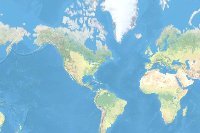

In [28]:
webmap_item